# **Sales Detection**

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = "Advertising.csv"
df = pd.read_csv(file_path)

In [3]:
# Drop unnecessary column
df.drop(columns=["Unnamed: 0"], inplace=True)

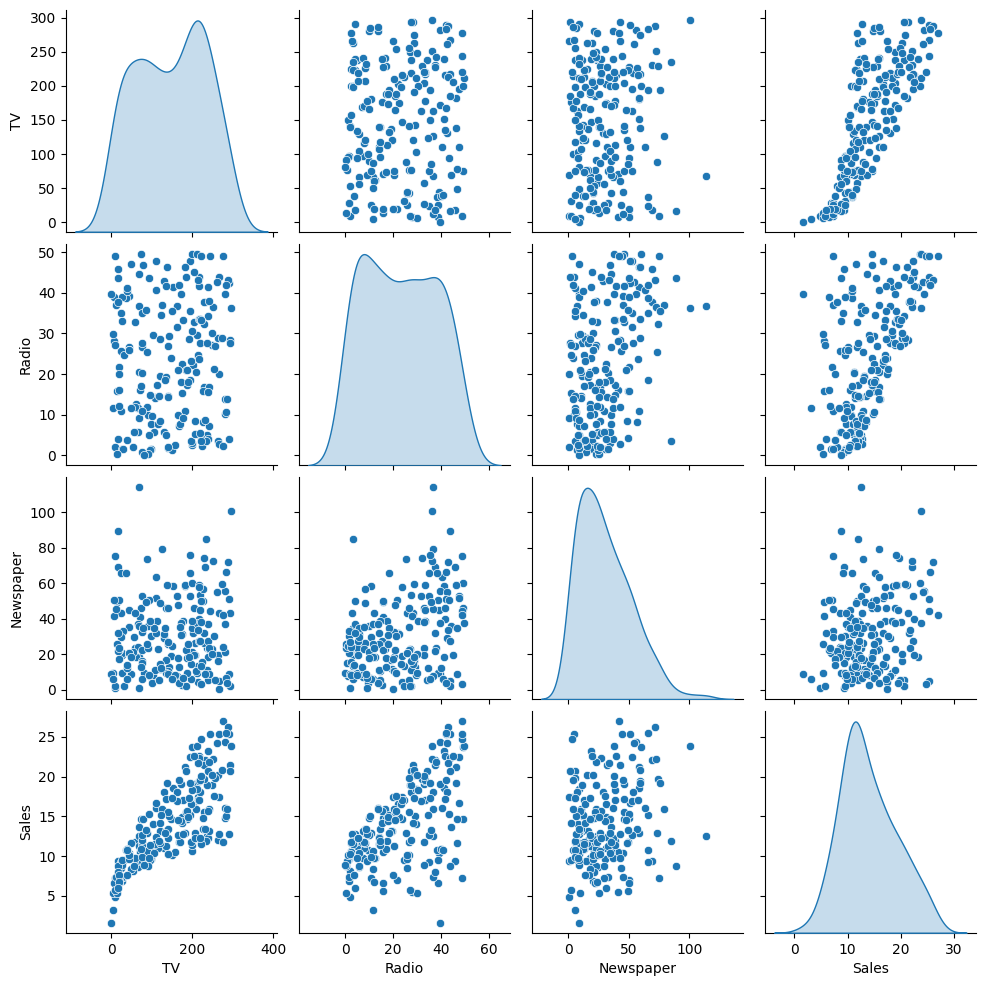

In [4]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df, diag_kind="kde")
plt.show()

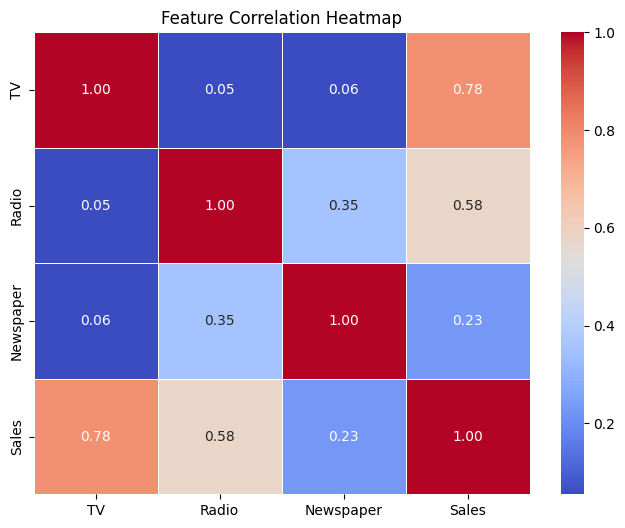

In [5]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

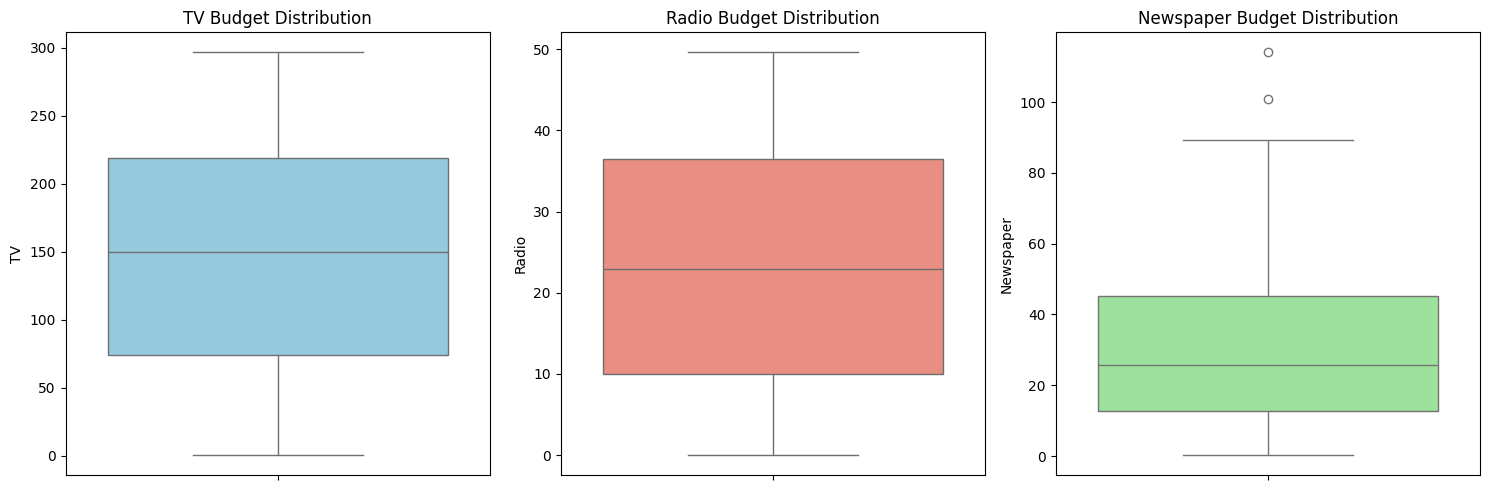

In [6]:
# Boxplots for Outlier Detection
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=df["TV"], ax=axes[0], color="skyblue")
axes[0].set_title("TV Budget Distribution")
sns.boxplot(y=df["Radio"], ax=axes[1], color="salmon")
axes[1].set_title("Radio Budget Distribution")
sns.boxplot(y=df["Newspaper"], ax=axes[2], color="lightgreen")
axes[2].set_title("Newspaper Budget Distribution")
plt.tight_layout()
plt.show()

In [7]:
# Splitting the dataset
X = df.drop(columns=["Sales"])
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

In [10]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE      RMSE  R2 Score
Linear Regression  1.460757  1.781600  0.899438
Decision Tree      0.985000  1.474788  0.931091
Random Forest      0.620725  0.768782  0.981275
